In [1]:
#get larlite
from larlite import larlite as ll

In [2]:
#create storage manager
sm = ll.storage_manager()
sm.set_io_mode(ll.storage_manager.kREAD)
sm.add_in_filename("../../App/mac/baby_output.root")
sm.open()

True

In [3]:
sm.next_event()

True

In [4]:
event_hits     = sm.get_data(ll.data.kHit,"fake_pi0")
event_clusters = sm.get_data(ll.data.kCluster,"ImageClusterHit")

#get ass
event_ass      = sm.get_data(ll.data.kAssociation,"ImageClusterHit")

#wipe ass
cluster_to_hit_ass = event_ass.association(event_clusters.id(),event_hits.id())

#get contour data
event_user = sm.get_data(ll.data.kUserInfo,"ImageClusterHit")

In [5]:
#graphics 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
hxy = np.array([ [event_hits[i].WireID().Wire,event_hits[i].PeakTime()] for i in xrange(event_hits.size())])


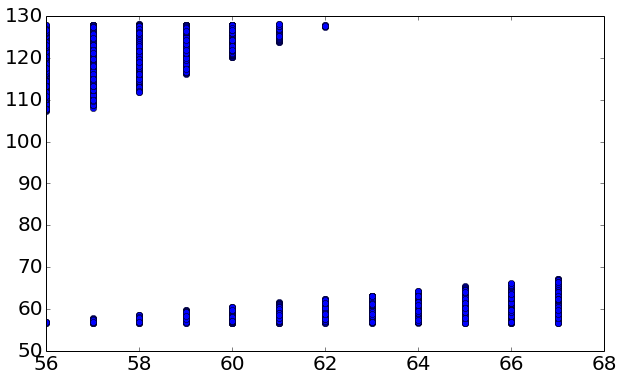

In [7]:
#show it
fig,ax=plt.subplots(figsize=(10,6))
matplotlib.rcParams['font.size']=20
matplotlib.rcParams['font.family']='serif'
plt.plot(hxy[:,0],hxy[:,1],'o')
plt.show()

In [8]:
print "There are...",cluster_to_hit_ass.size()," clusters."

There are... 2  clusters.


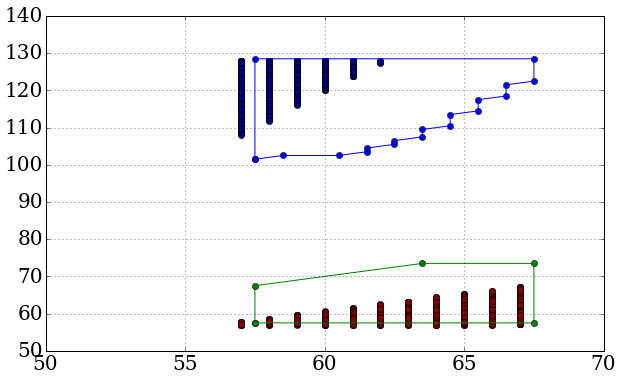

In [9]:
#Show the ImageClusters
hsv = plt.get_cmap('jet')
lors = hsv(np.linspace(0, 1.0, cluster_to_hit_ass.size()))

fig,ax=plt.subplots(figsize=(10,6))
for ix,cluster in enumerate(cluster_to_hit_ass):
    hslice = hxy[np.array(cluster)]
    plt.plot(hslice[:,0],hslice[:,1],'o',color=lors[ix])
plt.grid()


for c in xrange(event_user.size()):
    xx=np.array(event_user[c].get_darray('x'))
    yy=np.array(event_user[c].get_darray('y'))

    xx=np.append(xx,xx[0])
    yy=np.append(yy,yy[0])

    plt.plot(yy,xx,'o-')

ax.set_xlim(50,70)
ax.set_ylim(50,140)

plt.show()